# Big Data - Lab 1
## Miniproject - Data exploration
## Author: Aleksandra Szum, Index Number: 276092
### Instruction:

1. Download data set, Global Terrorism Database, from https://www.kaggle.com/START-UMD/gtd
2. Take a quick look at the data set. Check what's inside, how the data is structured, and where the data is corrupted (missing values, bad structure, etc).

### Solution:

The most important columns at the data set in my mind are:
* eventid - A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).
* iyear - This field contains the year in which the incident occurred.
* imonth - This field contains the number of the month in which the incident occurred.
* iday - This field contains the numeric day of the month on which the incident occurred.
* approxdate
* country - This field identifies the country code
* country_txt - This field identifies the country or location where the incident occurred.
* region - This field identifies the region code based on 12 regions
* region_txt - This field identifies the region in which the incident occurred.
* provstate - Name (at the time of event) of the 1st order subnational administrative region
* city - Name of the city, village, or town in which the incident occurred
* latitude - The latitude of the city in which the event occurred.
* longitude - The longitude of the city in which the event occurred.
* success - Success of a terrorist strike
* suicide - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
* attacktype1 - The general method of attack
* attacktype1_txt - The general method of attack and broad class of tactics used.
* targtype1
* targtype1_txt - The general type of target/victim
* targsubtype1
* targsubtype1_txt - The more specific target category
* target1 - The specific person, building, installation that was targeted and/or victimized
* natlty1
* natlty1_txt - The nationality of the target that was attacked
* gname - The name of the group that carried out the attack
* gsubname - additional details about group that carried out the attack like factions
* nperps - The total number of terrorists participating in the incident
* weaptype1
* weaptype1_txt - General type of weapon used in the incident
* weapsubtype1
* weapsubtype1_txt - More specific value for most of the Weapon Types
* nkill - The number of total confirmed fatalities for the incident
* nkillus -The number of U.S. citizens who died as a result of the incident
* nwound - Number of confirmed non-fatal injuries to both perpetrators and victims.
* nwoundus - The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims.

Import data to see what the data set is contained:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


How much unknown or NaN informations is contained in data [%]?

In [2]:
len(df[df['gname']=="Unknown"])/len(df)*100

45.561970598433604

More than 45,5%.

3. Think and create 5 questions to the data. Try to ask yourself what's really interesting in the data set. What's not so obvious. E.g. some trends, patterns, correlations.

My question:

a) What is the trend of attacks over the years? 

b) In which countries there was the most attack?

c) How many people died in attacks?

d) What kind of attack is the most popular?

e) which was the target of a terrorist attack?

4. Create a jupyter notebook and use python, numpy, pandas, matplotlib (at least) to provide all the answers to your questions.

## Answers of question:
### What is the trend of numbers attacks over the years? 


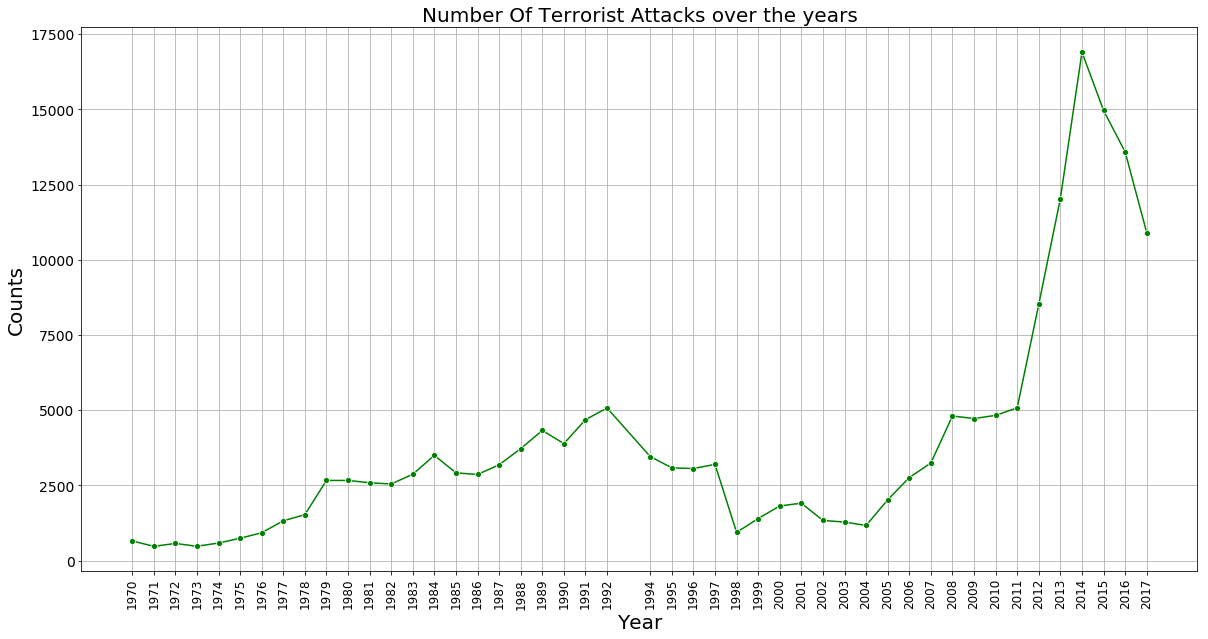

In [3]:
df['iyear'].fillna(0)
countAttack = df['iyear'].value_counts().sort_index()

plt.subplots(figsize=(20,10))
sns.lineplot(data=countAttack, marker='o', color='green')
plt.xticks(countAttack.index, rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.title('Number Of Terrorist Attacks over the years', fontsize=20)
plt.grid()
plt.show()


Missing data for 1993 years - no data in table.

Conclusion: Most terrorist attacks took place in 2014.

###  In which countries there was the most attack?

Note: It was shown first 50 country in the plot.

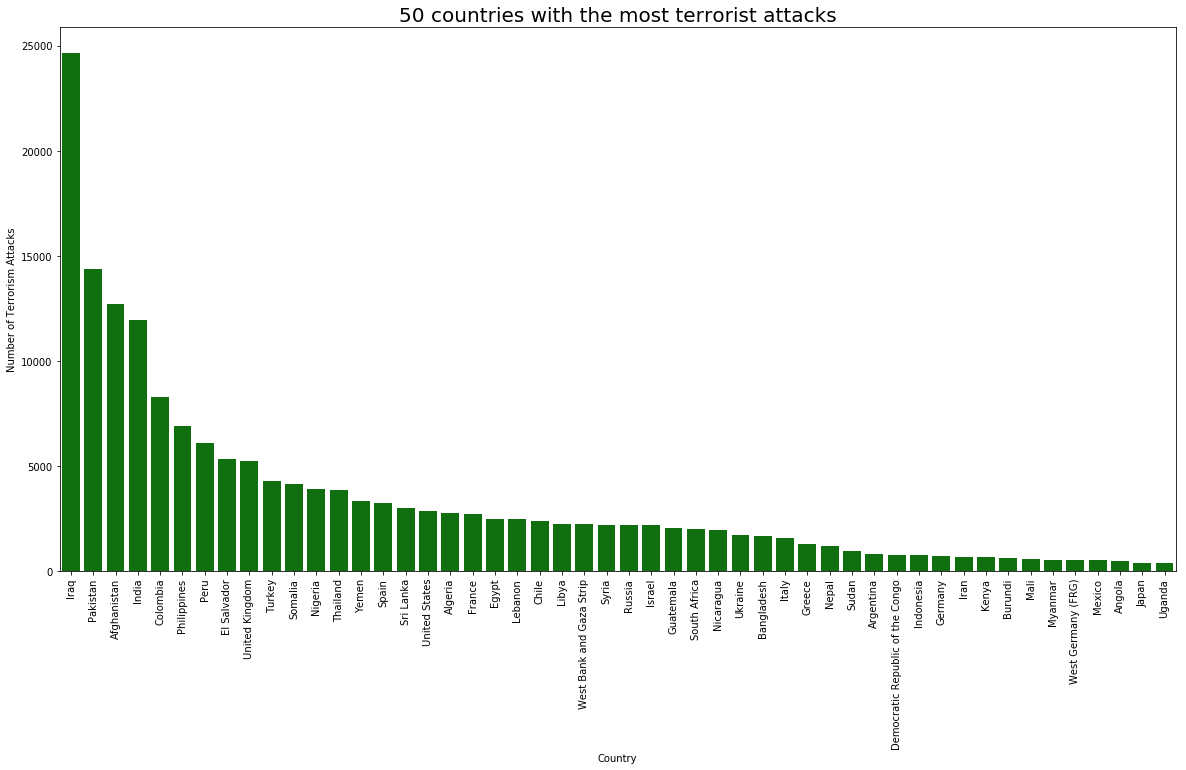

In [4]:
df['country_txt'].fillna(0)
country = df['country_txt'].value_counts()

plt.subplots(figsize=(20,10))
plot1 = sns.barplot(country.index[0:50],country[0:50], color='green')
plot1.set_xlabel("Country")
plot1.set_ylabel("Number of Terrorism Attacks")
plot1.set_xticklabels(country.index,rotation=90)
plt.title('50 countries with the most terrorist attacks', fontsize=20)
plt.show()


Conclusion: Most terrorist attacks were carried out in Iraq.

### How many people died in attacks?


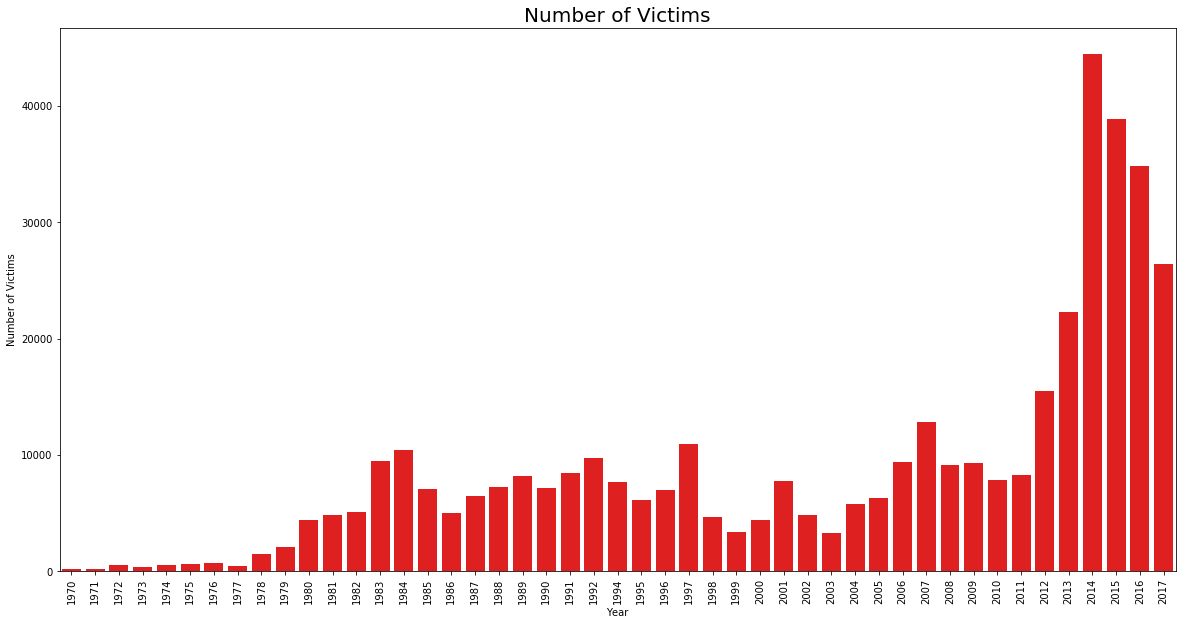

In [5]:
numberOfKill=df.groupby('iyear')['nkill'].sum().sort_index()

plt.subplots(figsize=(20,10))
plot1 = sns.barplot(numberOfKill.index,numberOfKill, color='red')
plot1.set_xlabel("Year")
plot1.set_ylabel("Number of Victims")
plot1.set_xticklabels(numberOfKill.index,rotation=90)
plt.title('Number of Victims', fontsize=20)
plt.show()


Conclusion: the largest number of victims was in 2014

### What kind of attack is the most popular?

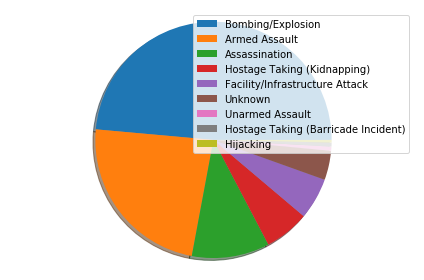

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [6]:
attackType = df['attacktype1_txt'].value_counts()
labels = df['attacktype1_txt'].value_counts().index


patches, texts = plt.pie(attackType, shadow=True, startangle=0)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()


sys.stdout.write(str(attackType))


Conclusion: the most popular type of terrorist attack is Bombing/Explosion.

### Which was the target of a terrorist attack?

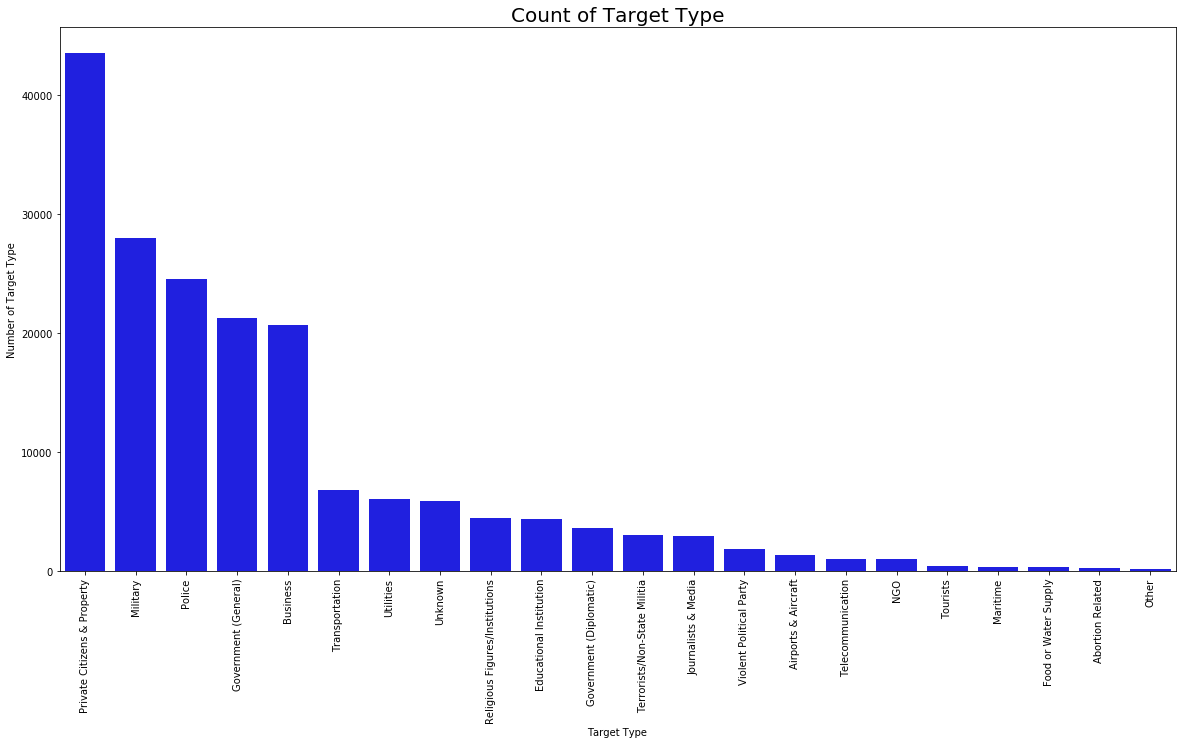

In [7]:
df['targtype1_txt'].fillna(0)
targetType = df['targtype1_txt'].value_counts()

plt.subplots(figsize=(20,10))
plot1 = sns.barplot(targetType.index,targetType, color='blue')
plot1.set_xlabel("Target Type")
plot1.set_ylabel("Number of Target Type")
plot1.set_xticklabels(targetType.index,rotation=90)
plt.title('Count of Target Type', fontsize=20)
plt.show()


Conclusion: the most popular type of terrorist attack is Private Citizens & Property.

5. Create a new github repository, and put your jupyter notebook there. - Done
6. Create readme.md file as well in your github root directory with all necessary instructions (what is in the repo, what libs are necessary to run the code, where to find data set and where to save it - this is necessary because the dataset is too big for github repo). - Done
7. Provide the necessary documentation and introduction in your notebook using markdown language, at least: data source description, data structure, importing process, data processing process. - Done
8. Put some data visualization in your notebook. Sometimes it's much easier to present the answer using a chart rather than numbers - Done
9. Check if your notebook run smoothly - use 'Reset & Run All' command from the menu. Save it. - Done
10. Export the notebook as HTML as well, and save the file in the repo. - Done
11. Do not forget to commit/push all the changes to your repo on hithub. - Done
12. Smile :) You did a good job! - Done
